# Probability Theory Review

### Preliminaries

- Goal 
  - Review of probability theory as a theory for rational/logical reasoning with uncertainties (i.e., a Bayesian interpretation)
- Materials        
  - Mandatory
    - These lecture notes
    - [Ariel Caticha - 2012 - Entropic Inference and the Foundations of Physics](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Caticha-2012-Entropic-Inference-and-the-Foundations-of-Physics.pdf), pp.7-26 (sections 2.1 through 2.5), on deriving probability theory. You may skip section 2.3.4: Cox's proof (pp.15-18).
    

  - Optional
    - [Ariel Caticha - 2012 - Entropic Inference and the Foundations of Physics](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Caticha-2012-Entropic-Inference-and-the-Foundations-of-Physics.pdf), pp.7-56 (ch.2: probability)
      - Great introduction to probability theory, in particular to its interpretation.
      - Absolutely worth your time to read the whole chapter!
    - [Edwin Jaynes - 2003 - Probability Theory -- The Logic of Science](https://archive.org/details/ProbabilityTheoryTheLogicOfScience). 
      - Brilliant book on Bayesian view on probability theory.
    - Bishop pp. 12-24

### Example Problem: Disease Diagnosis

- **Problem**: Given a disease with prevalence of  1%  and a test procedure  with sensitivity ('true positive' rate) of  95%  and specificity ('true negative' rate) of  85% , what is the chance that somebody who tests positive actually has the disease?

- **Solution**: Use probabilistic inference, to be discussed in this lecture. 

### The Design of Probability Theory

- Define an **event** (or "proposition") $A$ as a statement, whose truth can be contemplated by a person, e.g., 

$$𝐴= \texttt{'there is life on Mars'}$$

- If we assume the fact $$I = \texttt{'All known life forms require water'}$$ and a new piece of information $$x = \texttt{'There is water on Mars'}$$ becomes available, how _should_ our degree of belief in event $A$ be affected (if we were rational)? 

- [Richard T. Cox, 1946](https://aapt.scitation.org/doi/10.1119/1.1990764) developed a **calculus for rational reasoning** about how to represent and update the degree of _beliefs_ about the truth value of events when faced with new information.  

- In developing this calculus, only some very agreeable assumptions were made, e.g.,
  - (Transitivity). If the belief in $A$ is greater than the belief in $B$, and the belief in $B$ is greater than the belief in $C$, then the belief in $A$ must be greater than the belief in $C$.
  - (Consistency). If the belief in an event can be inferred in two different ways, then the two ways must agree on the resulting belief.

- This effort resulted in confirming that the [sum and product rules of Probability Theory](#PT-calculus) are the **only** proper rational way to process belief intensities. 

- $\Rightarrow$ Probability theory (PT) provides _the_ **theory of optimal processing of incomplete information** (see [Cox theorem](https://en.wikipedia.org/wiki/Cox%27s_theorem), and [Caticha](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Caticha-2012-Entropic-Inference-and-the-Foundations-of-Physics.pdf), pp.7-24), and as such provides a quantitative framework for drawing conclusions from a finite (read: incomplete) data set.

### Why Probability Theory for Machine Learning?

- Machine learning concerns drawing conclusions from (a finite set of) data and therefore PT provides the _optimal calculus for machine learning_. 

- In general, nearly all interesting questions in machine learning can be stated in the following form (a conditional probability):

$$p(\texttt{whatever-we-want-to-know}\, | \,\texttt{whatever-we-do-know})$$

- Examples
  - Predictions
  $$p(\,\texttt{future-observations}\,|\,\texttt{past-observations}\,)$$
  - Classify a received data point $x$ 
  $$p(\,x\texttt{-belongs-to-class-}k \,|\,x\,)$$
  - Update a model based on a new observation
   $$p(\,\texttt{model-parameters} \,|\,\texttt{new-observation},\,\texttt{past-observations}\,)$$

### Frequentist vs. Bayesian Interpretation of Probabilities

- The interpretation of a probability as a **degree-of-belief** about the truth value of an event is also called the **Bayesian** interpretation.  

- In the **Bayesian** interpretation, the probability is associated with a **state-of-knowledge** (usually held by a person). 
  - For instance, in a coin tossing experiment, $p(\texttt{tail}) = 0.4$ should be interpreted as the belief that there is a 40% chance that $\texttt{tail}$ comes up if the coin were tossed.
  - Under the Bayesian interpretation, PT calculus (sum and product rules) **extends boolean logic to rational reasoning with uncertainty**. 

- The Bayesian interpretation contrasts with the **frequentist** interpretation of a probability as the relative frequency that an event would occur under repeated execution of an experiment.

  - For instance, if the experiment is tossing a coin, then $p(\texttt{tail}) = 0.4$ means that in the limit of a large number of coin tosses, 40% of outcomes turn up as $\texttt{tail}$.     

- The Bayesian viewpoint is more generally applicable than the frequentist viewpoint, e.g., it is hard to apply the frequentist viewpoint to events like '$\texttt{it will rain tomorrow}$'. 

- The Bayesian viewpoint is clearly favored in the machine learning community. (In this class, we also strongly favor the Bayesian interpretation). 

### Probability Theory Notation

##### events
-  Define an **event** $A$ as a statement, whose truth can be contemplated by a person, e.g.,

$$A = \text{'it will rain tomorrow'}$$
 

- We write the denial of $A$, i.e. the event **not**-A, as $\bar{A}$. 

- Given two events $A$ and $B$, we write the **conjunction** "$A \wedge B$" as "$A,B$" or "$AB$". The conjunction $AB$ is true only if both $A$ and $B$ are true. 

- We will write the **disjunction** "$A \lor B$" as "$A + B$", which is true if either $A$ or $B$ is true or both $A$ and $B$ are true. 

- Note that, if $X$ is a variable, then an assignment $X=x$ (with $x$ a value, e.g., $X=5$) can be interpreted as an event. 

##### probabilities

- For any event $A$, with background knowledge $I$, the **conditional probability of $A$ given $I$**, is written as 
$$p(A|I)\,.$$

- All probabilities are in principle conditional probabilities of the type $p(A|I)$, since there is always some background knowledge. 

##### Unfortunately, PT notation is usually rather sloppy :(

- We often write $p(A)$ rather than $p(A|I)$ if the background knowledge $I$ is assumed to be obviously present. E.g., $p(A)$ rather than $p(\,A\,|\,\text{the-sun-comes-up-tomorrow}\,)$.

- (In the context of random variable assignments) we often write $p(x)$ rather than $p(X=x)$, assuming that the reader understands the context.  
  - In an apparent effort to further abuse notational conventions, $p(X)$ denotes the full distribution over random variable $X$, i.e., the distribution for all assignments for $X$. 

- If $X$ is a *discretely* valued variable, then $0\le p(X=x)\le 1$ is a probability *mass* function (PMF) with normalization $\sum_x p(x) =1$. If $X$ is *continuously* valued, then $p(X=x)\ge 0$ is a probability *density* function (PDF) with normalization $\int_x p(x)\mathrm{d}x=1$. Sometimes we do not bother to specify if $p(x)$ refers to a continuous or discrete variable. 
  - Note that if $X$ is continuously valued, then the value of the PDF $p(x)$ is not necessarily $\le 1$. E.g., a uniform distribution on the continuous domain $[0,.5]$ has value $p(x) = 2$.


### <a id="PT-calculus">Probability Theory Calculus</a>
 
 

- Let $p(A|I)$ indicate the belief in event $A$, given that $I$ is true. 

- The following product and sum rules are also known as the **axioms of probability theory**, but as discussed above, under some mild assumptions, they can be derived as the unique rules for *rational reasoning under uncertainty* ([Cox theorem, 1946](https://en.wikipedia.org/wiki/Cox%27s_theorem), and [Caticha, 2012](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Caticha-2012-Entropic-Inference-and-the-Foundations-of-Physics.pdf), pp.7-26).

- **Sum rule**. The disjunction for two events $A$ and $B$ given background $I$ is given by
$$ \boxed{p(A+B|I) = p(A|I) + p(B|I) - p(A,B|I)}$$
  

- **Product rule**. The conjuction of two events $A$ and $B$ with given background $I$ is given by 
$$ \boxed{p(A,B|I) = p(A|B,I)\,p(B|I)}$$
  
 

- **All legitimate probabilistic relations can be derived from the sum and product rules!**

### Independent and Mutually Exclusive Events

- Two events $A$ and $B$ are said to be **independent** if the probability of one is not altered by information about the truth of the other, i.e., $p(A|B) = p(A)$
  - $\Rightarrow$ If $A$ and $B$ are independent, given $I$, then the product rule simplifies to $$p(A,B|I) = p(A|I) p(B|I)$$

- Two events $A_1$ and $A_2$ are said to be **mutually exclusive** if they cannot be true simultanously, i.e., if $p(A_1,A_2)=0$.
  - $\Rightarrow$ For mutually exclusive events, the sum rule simplifies to
  $$p(A_1+A_2) = p(A_1) + p(A_2)$$
        

- A set of events $A_1, A_2, \ldots, A_N$ is said to be **exhaustive** if one of the statements is necessarily true, i.e., $A_1+A_2+\cdots +A_N=\mathrm{TRUE}$, or equivalently 
$$p(A_1+A_2+\cdots +A_N)=1$$


- Note that, if $A_1, A_2, \ldots, A_n$ are both **mutually exclusive** and **exhausitive**, then
    $$\sum_{n=1}^N p(A_n) = 1$$

### The Sum Rule and Marginalization

- We mentioned that every inference problem in PT can be evaluated through the sum and product rules. Next, we present two useful corollaries: (1) _Marginalization_ and (2) _Bayes rule_ 

- If $X$ and $Y$ are random variables over finite domains, than it follows from the above considerations about mutually exclusive and exhaustive events that 
$$
p(X) = \sum_Y p(X,Y) = \sum_Y p(X|Y) p(Y) \,.
$$

- Summing $Y$ out of a joint distribution is called **marginalization** and the result $p(X)$ is sometimes referred to as the **marginal probability**. 

- Note that this is just a **generalized sum rule**. In fact, Bishop (p.14) (and some other authors as well) calls this the sum rule.


- Of course, in the continuous domain, the (generalized) sum rule becomes
$$p(X)=\int p(X,Y) \,\mathrm{d}Y$$

### <a id="Bayes-rule">The Product Rule and Bayes Rule</a>

- Consider two variables $D$ and $\theta$; it follows from symmetry arguments that 
$$p(D,\theta)=p(D|\theta)p(\theta)=p(\theta|D)p(D)$$ 
and hence that
$$ p(\theta|D) = \frac{p(D|\theta) }{p(D)}p(\theta)\,.$$ 

- This formula is called **Bayes rule** (or Bayes theorem). While Bayes rule is always true, a particularly useful application occurs when $D$ refers to an observed data set and $\theta$ is set of model parameters. In that case,

  - the **prior** probability $p(\theta)$ represents our **state-of-knowledge** about proper values for $\theta$, before seeing the data $D$.
  - the **posterior** probability $p(\theta|D)$ represents our state-of-knowledge about $\theta$ after we have seen the data.

$\Rightarrow$ Bayes rule tells us how to update our knowledge about model parameters when facing new data. Hence, 

<center>
<div style="font-size:large; color:red">
Bayes rule is the fundamental rule for learning from data!
</div>
</center>

### Bayes Rule Nomenclature
- Some nomenclature associated with Bayes rule:
$$
\underbrace{p(\theta | D)}_{\text{posterior}} = \frac{\overbrace{p(D|\theta)}^{\text{likelihood}} \times \overbrace{p(\theta)}^{\text{prior}}}{\underbrace{p(D)}_{\text{evidence}}}
$$

- Note that the evidence (a.k.a. _marginal likelihood_ ) can be computed from the numerator through marginalization since
$$ p(D) = \int p(D,\theta) \,\mathrm{d}\theta = \int p(D|\theta)\,p(\theta) \,\mathrm{d}\theta$$

- Hence, having access to likelihood and prior is in principle sufficient to compute both the evidence and the posterior. To emphasize that point, Bayes rule is sometimes written as a transformation:

$$ \underbrace{\underbrace{p(\theta|D)}_{\text{posterior}}\cdot \underbrace{p(D)}_{\text{evidence}}}_{\text{this is what we want to compute}} = \underbrace{\underbrace{p(D|\theta)}_{\text{likelihood}}\cdot \underbrace{p(\theta)}_{\text{prior}}}_{\text{this is available}}$$ 


- For given $D$, the posterior probabilities of the parameters scale relatively against each other as

$$
p(\theta|D) \propto p(D|\theta) p(\theta)
$$

- $\Rightarrow$ All that we can learn from the observed data is contained in the likelihood function $p(D|\theta)$. This is called the **likelihood principle**.

### The Likelihood Function vs the Sampling Distribution

- Consider a distribution $p(D|\theta)$, where $D$ relates to variables that are observed (i.e., a "data set") and $\theta$ are model parameters.

- In general, $p(D|\theta)$ is just a function of the two variables $D$ and $\theta$. We distinguish two interpretations of this function, depending on which variable is observed (or given by other means). 

-  The **sampling distribution** (a.k.a. the **data-generating** distribution) $$p(D|\theta=\theta_0)$$ (which is a function of $D$ only) describes a probability distribution for data $D$, assuming that it is generated by the given model with parameters fixed at $\theta = \theta_0$.

- In a machine learning context, often the data is observed, and $\theta$ is the free variable. In that case, for given observations $D=D_0$, the **likelihood function** (which is a function only of the model parameters $\theta$) is defined as $$\mathrm{L}(\theta) \triangleq p(D=D_0|\theta)$$

- Note that $\mathrm{L}(\theta)$ is not a probability distribution for $\theta$ since in general $\sum_\theta \mathrm{L}(\theta) \neq 1$.

#### CODE EXAMPLE

Consider the following simple model for the outcome (head or tail) of a biased coin toss with parameter $\theta \in [0,1]$:

$$\begin{align*}
y &\in \{0,1\} \\
p(y|\theta) &\triangleq \theta^y (1-\theta)^{1-y}\\
\end{align*}$$

We can plot both the sampling distribution (i.e. $p(y|\theta=0.8)$) and the likelihood function (i.e. $L(\theta) = p(y=0|\theta)$).

In [1]:
using Pkg; Pkg.activate("probprog/workspace");Pkg.instantiate();
IJulia.clear_output();

Activating environment at `~/Documents/biaslab/repos/BMLIP/lessons/notebooks/probprog/workspace/Project.toml`


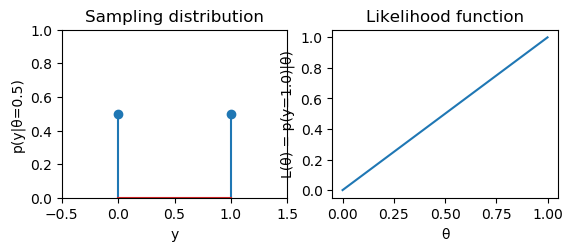

In [9]:
using PyPlot
#using Plots
p(y,θ) = θ.^y .* (1 .- θ).^(1 .- y)
f = figure()

θ = 0.5 # Set parameter
# Plot the sampling distribution
subplot(221); stem([0,1], p([0,1],θ)); 
title("Sampling distribution");
xlim([-0.5,1.5]); ylim([0,1]); xlabel("y"); ylabel("p(y|θ=$(θ))");

subplot(222);
_θ = 0:0.01:1
y = 1.0 # Plot p(y=1 | θ)
plot(_θ,p(y,_θ))
title("Likelihood function"); 
xlabel("θ"); 
ylabel("L(θ) = p(y=$y)|θ)");



The (discrete) sampling distribution is a valid probability distribution. 
However, the likelihood function $L(\theta)$ clearly isn't, since $\int_0^1 L(\theta) \mathrm{d}\theta \neq 1$. 


### Probabilistic Inference

- **Probabilistic inference** refers to computing
$$
p(\,\text{whatever-we-want-to-know}\, | \,\text{whatever-we-already-know}\,)
$$
  - For example: 
  $$\begin{align*}
 p(\,\text{Mr.S.-killed-Mrs.S.} \;&|\; \text{he-has-her-blood-on-his-shirt}\,) \\
 p(\,\text{transmitted-codeword} \;&|\;\text{received-codeword}\,) 
  \end{align*}$$

- This can be accomplished by repeated application of sum and product rules.

- In particular, consider a joint distribution $p(X,Y,Z)$. Assume we are interested in $p(X|Z)$:
$$\begin{align*}
p(X|Z) \stackrel{p}{=} \frac{p(X,Z)}{p(Z)} \stackrel{s}{=} \frac{\sum_Y p(X,Y,Z)}{\sum_{X,Y} p(X,Y,Z)} \,,
\end{align*}$$
where the 's' and 'p' above the equality sign indicate whether the sum or product rule was used. 

- In the rest of this course, we'll encounter many long probabilistic derivations. For each manipulation, you should be able to associate an 's' (for sum rule), a 'p' (for product or Bayes rule) or an 'm' (for a simplifying model assumption) above any equality sign.

### Working out the example problem: Disease Diagnosis

- **Problem**: Given a disease $D$ with prevalence of $1\%$ and a test procedure $T$ with sensitivity ('true positive' rate) of $95\%$ and specificity ('true negative' rate) of $85\%$, what is the chance that somebody who tests positive actually has the disease?

- **Solution**: The given data are $p(D=1)=0.01$, $p(T=1|D=1)=0.95$ and $p(T=0|D=0)=0.85$. Then according to Bayes rule,

$$\begin{align*}
p( D=1 &| T=1) \\
&\stackrel{p}{=} \frac{p(T=1|D=1)p(D=1)}{p(T=1)} \\
&\stackrel{s}{=} \frac{p(T=1|D=1)p(D=1)}{p(T=1|D=1)p(D=1)+p(T=1|D=0)p(D=0)} \\
&= \frac{0.95\times0.01}{0.95\times0.01 + 0.15\times0.99} = 0.0601
\end{align*}$$

### Inference Exercise: Bag Counter

- **Problem**:  A bag contains one ball, known to be either white or black. A white ball is put in, the bag is shaken,
 and a ball is drawn out, which proves to be white. What is now the
 chance of drawing a white ball?
 

- **Solution**: Again, use Bayes and marginalization to arrive at $p(\text{white}|\text{data})=2/3$, see [Exercises](https://nbviewer.jupyter.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/Exercises.ipynb) notebook.

- $\Rightarrow$ Note that probabilities describe **a person's state of knowledge** rather than a 'property of nature'.

### Inference Exercise: Causality?

- **Problem**: A dark bag contains five red balls and seven green ones. (a) What is the probability of drawing a red ball on the first draw? Balls are not returned to the bag after each draw. (b) If you know that on the second draw the ball was a green one, what is now the probability of drawing a red ball on the first draw?

- **Solution**: (a) $5/12$. (b) $5/11$, see [Exercises](https://nbviewer.jupyter.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/Exercises.ipynb) notebook.

- $\Rightarrow$ Again, we conclude that conditional probabilities reflect **implications for a state of knowledge** rather than temporal causality.

### PDF for the Sum of Two Variables

- Given two random **independent** variables
$X$ and $Y$, with PDF's $p_x(x)$ and $p_y(y)$. The PDF for $Z=X+Y$ is given by 
$$
p_z (z) = \int_{ - \infty }^\infty  {p_x (x)p_y (z - x)\,\mathrm{d}{x}}
$$ 


- **Proof**: Let $p_z(z)$ be the probability that $Z$ has value $z$. This occurs if $X$ has some value $x$ and at the same time $Y=z-x$, with joint probability $p_x(x)p_y(z-x)$. Since $x$ can be any value, we sum over all possible values for $x$ to get
$
p_z (z) = \int_{ - \infty }^\infty  {p_x (x)p_y (z - x)\,\mathrm{d}{x}}
$    
  - I.o.w., $p_z(z)$ is the **convolution** of $p_x$ and $p_y$.
  - Note that $p_z(z) \neq p_x(x) + p_y(y)\,$ !!
 

- [https://en.wikipedia.org/wiki/List_of_convolutions_of_probability_distributions](https://en.wikipedia.org/wiki/List_of_convolutions_of_probability_distributions) shows how these convolutions work out for a few common probability distributions. 

- In linear stochastic systems theory, the Fourier Transform of a PDF (i.e., the characteristic function) plays an important computational role. Why?

#### CODE EXAMPLE

- Consider the PDF of the sum of two independent Gaussians $X$ and $Y$:

$$\begin{align*}
p_X(x) &= \mathcal{N}(\,x\,|\,\mu_X,\sigma_X^2\,) \\ 
p_Y(y) &= \mathcal{N}(\,y\,|\,\mu_Y,\sigma_Y^2\,) \\
Z &= X + Y
\end{align*}$$

- Performing the convolution (nice exercise) yields a Gaussian PDF for $Z$: 

$$
p_Z(z) = \mathcal{N}(\,z\,|\,\mu_X+\mu_Y,\sigma_X^2+\sigma_Y^2\,).
$$

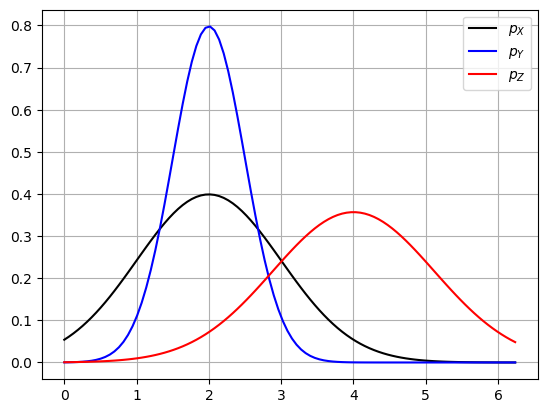

In [4]:
using PyPlot, Distributions
μx = 2.
σx = 1.
μy = 2.
σy = 0.5
μz = μx+μy; σz = sqrt(σx^2 + σy^2)
x = Normal(μx, σx)
y = Normal(μy, σy)
z = Normal(μz, σz)
range_min = minimum([μx-2*σx, μy-2*σy, μz-2*σz])
range_max = maximum([μx+2*σx, μy+2*σy, μz+2*σz])
range_grid = range(range_min, stop=range_max, length=100)
plot(range_grid, pdf.(x,range_grid), "k-")
plot(range_grid, pdf.(y,range_grid), "b-")
plot(range_grid, pdf.(z,range_grid), "r-")
legend([L"p_X", L"p_Y", L"p_Z"])
grid()

### PDF for the Product of Two Variables

- For two continuous random **independent** variables
$X$ and $Y$, with PDF's $p_x(x)$ and $p_y(y)$, the PDF of 
$Z = X Y $ is given by 
$$
p_z(z) = \int_{-\infty}^{\infty} p_x(x) \,p_y(z/x)\, \frac{1}{|x|}\,\mathrm{d}x
$$

- For proof, see [https://en.wikipedia.org/wiki/Product_distribution](https://en.wikipedia.org/wiki/Product_distribution)

- Generally, this integral does not lead to an analytical expression for $p_z(z)$. For example, [**the product of two independent variables that are both normally (Gaussian) distributed does not lead to a normal distribution**](https://nbviewer.jupyter.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/The-Gaussian-Distribution.ipynb#product-of-gaussians).
  - Exception: the distribution of the product of two variables that both have [log-normal distributions](https://en.wikipedia.org/wiki/Log-normal_distribution) is again a lognormal distribution.
    - (If $X$ has a normal distribution, then $Y=\exp(X)$ has a log-normal distribution.)

### Moments of the PDF

- Consider a distribution $p(x)$. The **expected value** or **mean** is defined as 
$$\mathrm{E}[x] \triangleq  \int x \,p(x) \,\mathrm{d}{x}$$ 

- The **variance** is defined as 
$$\mathrm{var}[x] \triangleq \mathrm{E} \left[(x-\mathrm{E}[x])(x-\mathrm{E}[x])^T \right]$$ 

- The **covariance** matrix between _vectors_ $x$ and $y$ is defined as
$$\begin{align*}
    \mathrm{cov}[x,y] &\triangleq \mathrm{E}\left[ (x-\mathrm{E}[x]) (y-\mathrm{E}[y])^T \right]\\
    &= \mathrm{E}\left[ (x-\mathrm{E}[x]) (y^T-\mathrm{E}[y^T]) \right]\\
    &= \mathrm{E}[x y^T] - \mathrm{E}[x]\mathrm{E}[y^T]
\end{align*}$$



### Linear Transformations

- No matter how $x$ is distributed, we can derive that (see [Exercises](https://nbviewer.jupyter.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/Exercises.ipynb) notebook)

$$\begin{align}
\mathrm{E}[Ax +b] &= A\mathrm{E}[x] + b \tag{SRG-3a}\\
\mathrm{var}[Ax +b] &= A\,\mathrm{var}[x]\,A^T \tag{SRG-3b}
\end{align}$$

-  (The tag (SRG-3a) refers to the corresponding eqn number in Sam Roweis [Gaussian identities](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Roweis-1999-gaussian-identities.pdf) notes.)



### Example: Mean and Variance for the Sum of Two Variables

- For any distribution of $x$ and $y$ and $z=x+y$ (proof by [Exercise](https://nbviewer.jupyter.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/Exercises.ipynb))

$$\begin{align*}
    \mathrm{E}[z] &= \mathrm{E}[x] + \mathrm{E}[y] \\
    \mathrm{var}[z] &= \mathrm{var}[x] + \mathrm{var}[y] + 2\mathrm{cov}[x,y] 
\end{align*}$$

- Clearly, it follows that if $x$ and $y$ are **independent**, then

$$\mathrm{var}[z] = \mathrm{var}[x] + \mathrm{var}[y] $$

### Review Probability Theory

- Interpretation as a degree of belief, i.e. a state-of-knowledge, not as a property of nature.

- We can do everything with only the **sum rule** and the **product rule**. In practice, **Bayes rule** and **marginalization** are often very useful for inference, i.e., for computing

$$p(\,\text{what-we-want-to-know}\,|\,\text{what-we-already-know}\,)\,.$$

- Bayes rule $$ p(\theta|D) = \frac{p(D|\theta)p(\theta)} {p(D)} $$ is the fundamental rule for learning from data!

- That's really about all you need to know about probability theory, but you need to _really_ know it, so do the [Exercises](https://nbviewer.jupyter.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/Exercises.ipynb).

In [5]:
open("../../styles/aipstyle.html") do f
    display("text/html", read(f,String))
end

<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->